<a href="https://colab.research.google.com/github/wallace91x/uci-exploratory-data-analysis/blob/main/notebook/Analise_de_dados_e_boas_praticas_Wallace_Conceicao(40530010055_20250_01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Wallace de Lima da Silva Conceicao

**Matrícula:** 4052024002302

**Dataset:** [Default Credit Card Clients](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients)


# Descrição do Problema

Este projeto tem como objetivo realizar a análise exploratória e o pré-processamento do dataset **"Default of Credit Card Clients"**, disponível no UCI Machine Learning Repository.

O conjunto de dados contém informações sobre 30.000 clientes de um banco em Taiwan, com o objetivo principal de prever se o cliente irá ou não **inadimplir** no próximo mês com base em características demográficas, histórico de crédito e comportamento de pagamento.

Através dessa análise, buscaremos entender o perfil dos clientes inadimplentes, identificar padrões e preparar os dados para aplicação de modelos preditivos. O entendimento é de que prever comportamento de inadimplência na concessão de créditos é vital para maior blindagem financeira, expansão sadia da área de credítica e comercial e fomento econômico.


## Premissas Consideradas

Durante a análise exploratória e o pré-processamento do dataset `default_credit_card_clients.csv`, foram adotadas as seguintes premissas:

- Os dados representam informações financeiras e comportamentais de clientes titulares de cartão de crédito de uma instituição bancária em Taiwan, no período de abril a setembro de 2005.
- As variáveis monetárias estão expressas em **Novo Dólar Taiwanês (TWD)**, apesar de alguns documentos utilizarem o prefixo “NT”.
- A variável `default payment next month` (0 = não inadimplente, 1 = inadimplente) pode ser utilizada como variável-alvo em um cenário futuro de classificação supervisionada, mas neste notebook é tratada apenas como variável de análise estatística.
- A amostragem dos clientes foi feita previamente e não reflete necessariamente a totalidade dos clientes da instituição financeira original.



## Hipóteses do Problema

  1. Clientes com limites de crédito mais baixos tendem a inadimplir mais.
  2. Atrasos anteriores no pagamento (PAY_0 a PAY_6) aumentam a chance de inadimplência.
  3. Clientes mais jovens podem apresentar taxas maiores de inadimplência.
  4. Estado civil e escolaridade podem influenciar o risco de default.
  5. Proporção entre valor da fatura e pagamento é um bom preditor de risco.


## Tipo de Problema

Este notebook **não implementa modelos de Machine Learning**, seu foco é realizar uma **análise exploratória e um pré-processamento de dados**, com o objetivo de **preparar os dados para aplicações futuras de aprendizado supervisionado**.

O dataset utilizado possui uma variável que representa inadimplência (`default payment next month`), o que caracteriza, em um contexto completo, um problema de **classificação binária supervisionada** (0 = não inadimplente, 1 = inadimplente). Entretanto, neste trabalho, a etapa de modelagem não será executada.

A análise aqui realizada busca:

- Compreender a estrutura e a qualidade dos dados;
- Detectar padrões, outliers e relações relevantes entre variáveis;
- Aplicar boas práticas de pré-processamento, como tratamento de valores faltantes, codificação e normalização;
- Deixar a base pronta para ser utilizada futuramente em modelos de aprendizado de máquina ou em estudos estatísticos aprofundados.

Essa abordagem é essencial em pipelines de ciência de dados, pois garante integridade e coerência na fase mais crítica: a **preparação dos dados**.




## Seleção de Dados

O dataset utilizado foi extraído do [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients).  
Ele foi escolhido por conter um problema realista, alinhado ao contexto de **análise de risco de crédito**, área em que possuo vivência profissional, e que permite aplicar uma gama ampla de técnicas de análise exploratória, visualização e aprendizado de máquina (em etapa futura).

O arquivo original em formato `.xls` foi convertido para `.csv`, o que facilita seu uso em notebooks do Google Colab e reprodutibilidade via GitHub. O processo simples foi feito [aqui](https://colab.research.google.com/drive/10UanKfBZi07dY3WwBwN9QDZ4RyCYSeQy#scrollTo=YsebDecjdol8).


## Dicionário de Dados Detalhado e Atributos do dataset

O dataset contém **30.000 registros** com informações demográficas, financeiras e comportamentais dos clientes. São **24 variáveis independentes** e **1 variável alvo** (`default payment next month`).

A tabela a seguir apresenta todos os atributos do dataset, seu tipo de dado e uma breve descrição.

| Nome da Coluna                 | Tipo     | Descrição                                                                                           |
|--------------------------------|----------|-----------------------------------------------------------------------------------------------------|
| ID                             | int64    | Identificador único do cliente                                                                      |
| LIMIT_BAL                      | int64    | Limite de crédito concedido (em NT dólares)                                                         |
| SEX                            | int64    | Sexo do cliente (1 = masculino, 2 = feminino)                                                       |
| EDUCATION                      | int64    | Nível de escolaridade (1 = pós-graduação, 2 = graduação, 3 = ensino médio, 4 = outros)              |
| MARRIAGE                       | int64    | Estado civil (1 = casado, 2 = solteiro, 3 = outros)                                                 |
| AGE                            | int64    | Idade do cliente (em anos)                                                                          |
| PAY_0                          | int64    | Status do pagamento em setembro (0 = pagamento feito, 1 = 1 mês de atraso, -1 = pagamento adiantado)|
| PAY_2                          | int64    | Status do pagamento em agosto                                                                       |
| PAY_3                          | int64    | Status do pagamento em julho                                                                        |
| PAY_4                          | int64    | Status do pagamento em junho                                                                        |
| PAY_5                          | int64    | Status do pagamento em maio                                                                         |
| PAY_6                          | int64    | Status do pagamento em abril                                                                        |
| BILL_AMT1                      | int64    | Valor da fatura em setembro                                                                         |
| BILL_AMT2                      | int64    | Valor da fatura em agosto                                                                           |
| BILL_AMT3                      | int64    | Valor da fatura em julho                                                                            |
| BILL_AMT4                      | int64    | Valor da fatura em junho                                                                            |
| BILL_AMT5                      | int64    | Valor da fatura em maio                                                                             |
| BILL_AMT6                      | int64    | Valor da fatura em abril                                                                            |
| PAY_AMT1                       | int64    | Valor pago em setembro                                                                              |
| PAY_AMT2                       | int64    | Valor pago em agosto                                                                                |
| PAY_AMT3                       | int64    | Valor pago em julho                                                                                 |
| PAY_AMT4                       | int64    | Valor pago em junho                                                                                 |
| PAY_AMT5                       | int64    | Valor pago em maio                                                                                  |
| PAY_AMT6                       | int64    | Valor pago em abril                                                                                 |
| default payment next month     | int64    | Variável alvo: 1 = inadimplente, 0 = adimplente no próximo mês                                      |


# Importação das Bibliotecas Necessárias e Carga de Dados

Nesta etapa, são importadas as bibliotecas essenciais para análise exploratória, visualização e manipulação dos dados.  
O dataset é carregado diretamente da versão `.csv`, hospedada no GitHub, para garantir reprodutibilidade.


In [69]:
# Manipulação de dados
import pandas as pd
import numpy as np
import math

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo dos gráficos
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Set2")
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')


In [70]:

import random
np.random.seed(42)
random.seed(42)

# Leitura do dataset via GitHub
url = 'https://raw.githubusercontent.com/wallace91x/uci-exploratory-data-analysis/main/data/default_credit_card_clients.csv'
df = pd.read_csv(url)

In [71]:
# Visualização inicial dos dados
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Bibliotecas Utilizadas

A escolha das bibliotecas foi feita com base nas necessidades específicas deste projeto, abrangendo análise exploratória, visualização de dados, pré-processamento e manipulação de dados.

- **pandas / numpy**: Manipulação e análise de dados tabulares; base para criação de DataFrames e operações vetoriais.
- **matplotlib / seaborn**: Criação de gráficos e visualizações estatísticas para identificação de padrões e anomalias.
- **random / numpy.random**: Definição de seeds para garantir reprodutibilidade dos resultados.

Essa combinação permite conduzir o projeto de forma completa e estruturada, atendendo aos requisitos da análise de dados.


# Análise de Dados

Esta etapa tem como objetivo compreender a estrutura, o conteúdo e possíveis problemas do dataset. A análise exploratória é conduzida com base nas hipóteses definidas anteriormente e será complementada por visualizações e métricas descritivas.


## Parte 1: Informações básicas e tipos de dados

In [72]:
# Formato do dataset
print(f"Total de linhas: {df.shape[0]}")
print(f"Total de colunas: {df.shape[1]}")

# Tipos de dados
df.dtypes.value_counts()


Total de linhas: 30000
Total de colunas: 25


,count
int64,25


## Parte 2: Verificação de Valores ausentes

In [73]:
# Checagem de valores nulos
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if missing.empty:
    print("Nenhum valor ausente encontrado.")
else:
    print("Valores ausentes detectados:")
    display(missing)

Nenhum valor ausente encontrado.


## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [74]:
# Estatísticas descritivas básicas do dataset
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,"30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00",...,"30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00"
mean,"15,000.50","167,484.32",1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,...,"43,262.95","40,311.40","38,871.76","5,663.58","5,921.16","5,225.68","4,826.08","4,799.39","5,215.50",0.22
std,"8,660.40","129,747.66",0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,...,"64,332.86","60,797.16","59,554.11","16,563.28","23,040.87","17,606.96","15,666.16","15,278.31","17,777.47",0.42
min,1.00,"10,000.00",1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,...,"-170,000.00","-81,334.00","-339,603.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"7,500.75","50,000.00",1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,...,"2,326.75","1,763.00","1,256.00","1,000.00",833.00,390.00,296.00,252.50,117.75,0.00
50%,"15,000.50","140,000.00",2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,...,"19,052.00","18,104.50","17,071.00","2,100.00","2,009.00","1,800.00","1,500.00","1,500.00","1,500.00",0.00
75%,"22,500.25","240,000.00",2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,...,"54,506.00","50,190.50","49,198.25","5,006.00","5,000.00","4,505.00","4,013.25","4,031.50","4,000.00",0.00
max,"30,000.00","1,000,000.00",2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,...,"891,586.00","927,171.00","961,664.00","873,552.00","1,684,259.00","896,040.00","621,000.00","426,529.00","528,666.00",1.00


## Insights iniciais a partir das estatísticas descritivas
---

**• Limite de crédito — `LIMIT_BAL`**

A média é de cerca **NT 167.000** e a mediana de cerca **NT 140.000**. O desvio-padrão elevado (**NT 130.000**) somado a um máximo de **NT 1.000.000** revela uma distribuição com cauda longa à direita. Para modelos lineares, vale considerar log transform ou robust scaling a fim de mitigar o efeito de outliers.

**• Idade — `AGE`**  
A mediana é **34 anos** (IQR 28-41). A amostra concentra-se em adultos jovens, com poucos clientes acima de 60 anos. Criar faixas etárias explícitas (< 30, 30-40, 40-50, > 50) pode capturar variações de risco dificilmente modeladas por uma relação linear simples.

**• Status de pagamento recente — `PAY_0` a `PAY_6`**  
A moda ocorre em **0** ou **-1** (pagamento em dia/adiantado), mas há registros extremos de **8-9 meses** de atraso. Atrasos mais recentes (ex.: `PAY_0`) tendem a influenciar fortemente a inadimplência futura — hipótese que validaremos na análise de correlação.

**• Relação fatura × pagamento — `BILL_AMT` e `PAY_AMT`**  
As medianas de fatura giram em torno de **NT 50.000**, enquanto os valores pagos medianos ficam próximos de **NT 2.000**. Muitos clientes quitam apenas parte da fatura, aumentando o risco de default. Razões como `bill_amt / limit_bal` e `pay_amt / bill_amt` são fortes candidatas a novas features.

**• Variável-alvo — `default_payment_next_month`**  
A taxa de inadimplência é **≈ 22%**. O desbalanceamento é moderado; modelos sensíveis à distribuição de classes podem se beneficiar de `class_weight="balanced"`.

**• Valores faltantes**  
Não há **valores nulos (NaN)** em nenhuma coluna sendo, por hora, eliminada a necessidade de imputação nesta fase.


## Visualizações univariadas
*As visualizações univariadas analisam a distribuição de uma variável de cada vez, sem considerar a influência de outros atributos. Por meio de histogramas, boxplots ou gráficos de barras, é possível identificar padrões, tendências, presença de outliers e o perfil geral de cada atributo do conjunto de dados. Essa etapa é fundamental para conhecer a base, detectar possíveis anomalias e guiar decisões sobre transformações ou tratamentos necessários.*



**Histograma + boxplot dos atributos numéricos.**

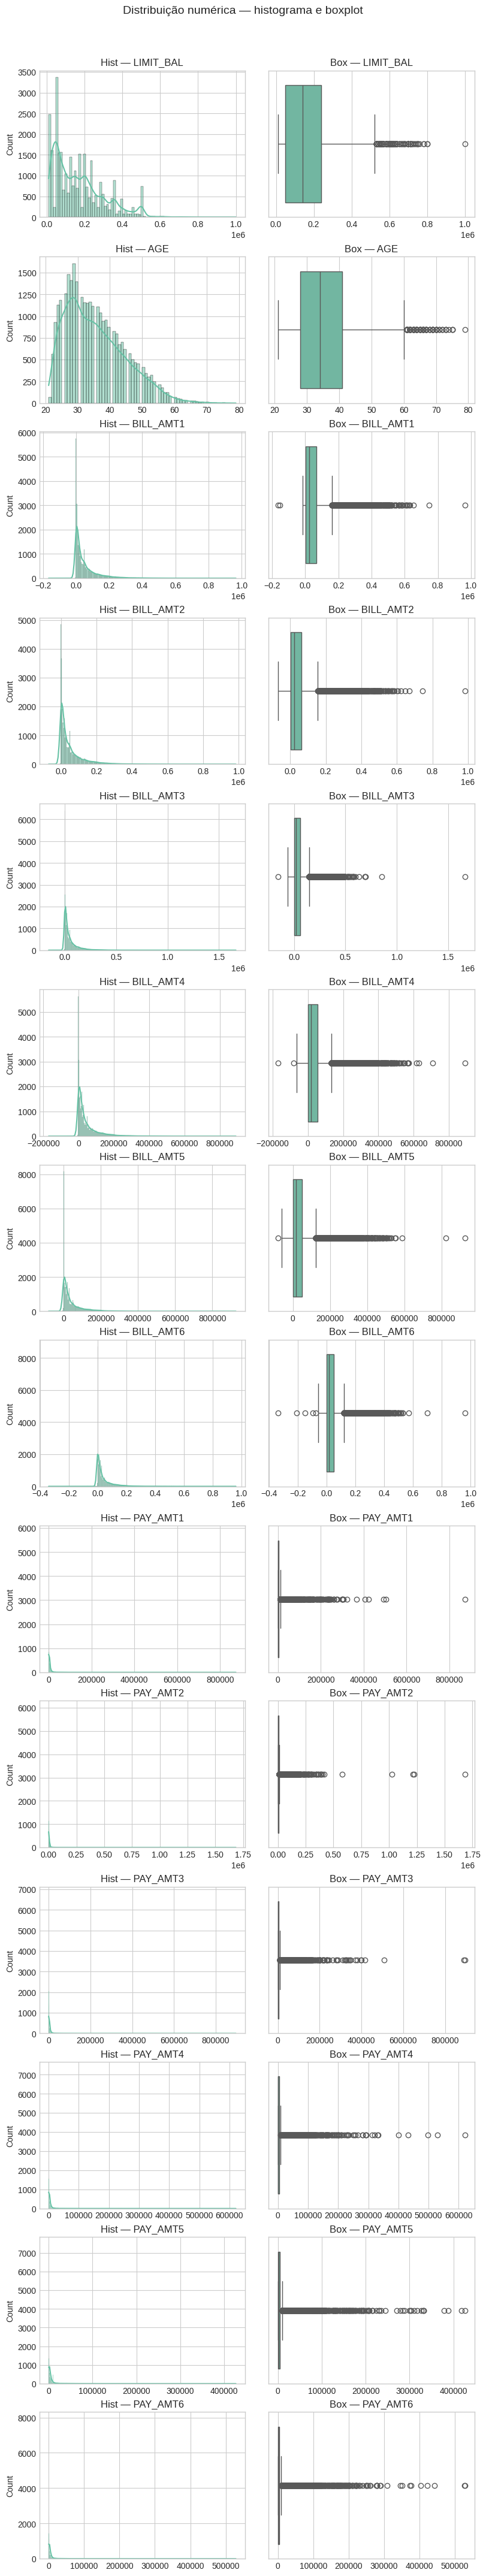

In [75]:
num_cols = [
    "LIMIT_BAL", "AGE",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3",
    "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3",
    "PAY_AMT4", "PAY_AMT5", "PAY_AMT6",
]

n_rows = len(num_cols)
fig, axes = plt.subplots(
    n_rows, 2, figsize=(8, 3 * n_rows),
    constrained_layout=True, sharex=False, sharey=False
)

axes = np.atleast_2d(axes)

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Hist — {col}")
    axes[i, 0].set_xlabel("")
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f"Box — {col}")
    axes[i, 1].set_xlabel("")

plt.suptitle("Distribuição numérica — histograma e boxplot", y=1.02, fontsize=14)
plt.show()




### Insights sobre a distribuição dos atributos numéricos  

- **Assimetria à direita**: `LIMIT_BAL`, `BILL_AMT*` e `PAY_AMT*` exibem cauda longa; outliers podem distorcer modelos lineares.  
  - *Próximo passo*: aplicar `np.log1p` ou `RobustScaler` antes da modelagem.  
- **Idade (`AGE`)** concentra-se entre 25 e 45 anos; poucos clientes fora dessa faixa.  
  - *Insight*: criar faixas etárias explícitas (< 30, 30-40, 40-50, > 50) pode tornar padrões de risco mais claros.  
- **Valores pagos x fatura**: `PAY_AMT*` são muito menores que `BILL_AMT*`.  
  - *Feature candidate*: razões `pay_amt / bill_amt` para medir esforço de pagamento.  
- **Outliers visíveis** em `BILL_AMT6` e `PAY_AMT6`; importante decidir se serão retirados ou mantidos.

##### **Barplots em grade (dados categóricos)**

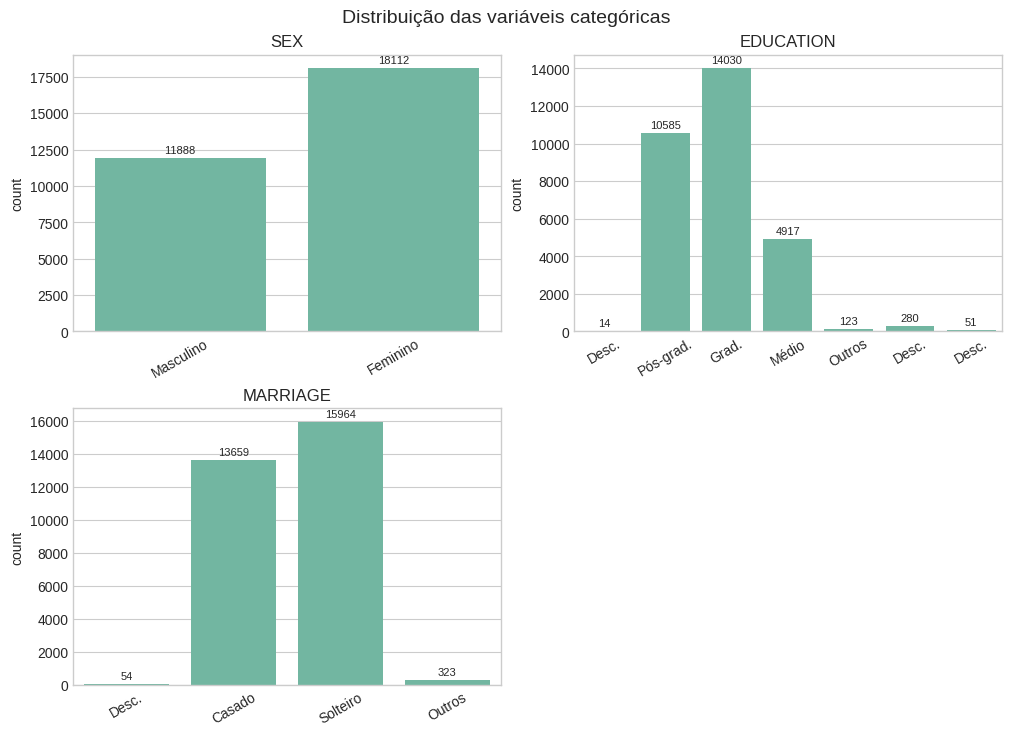

In [76]:


# Dicionários de labels curtos
sex_labels = {1: 'Masculino', 2: 'Feminino'}
education_labels = {
    0: 'Desc.',
    1: 'Pós-grad.',
    2: 'Grad.',
    3: 'Médio',
    4: 'Outros',
    5: 'Desc.',
    6: 'Desc.'
}
marriage_labels = {0: 'Desc.', 1: 'Casado', 2: 'Solteiro', 3: 'Outros'}

# Variáveis categóricas e seus dicionários de label
cat_cols = ["SEX", "EDUCATION", "MARRIAGE"]
label_dicts = [sex_labels, education_labels, marriage_labels]

n_cols  = 2
n_rows  = math.ceil(len(cat_cols) / n_cols)

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(5 * n_cols, 3.5 * n_rows),
    constrained_layout=True, sharex=False
)
axes = axes.flatten()

for ax, col, labels_dict in zip(axes, cat_cols, label_dicts):
    sns.countplot(x=df[col], order=sorted(df[col].unique()), ax=ax)
    ax.set_title(col)

    unique_vals = sorted(df[col].unique())
    ax.set_xticks(range(len(unique_vals)))  # Garante que há posição fixa
    new_labels = [labels_dict.get(x, str(x)) for x in unique_vals]
    ax.set_xticklabels(new_labels, rotation=30)

    ax.set_xlabel("")
    ax.bar_label(ax.containers[0], padding=2, fontsize=8)


for ax in axes[len(cat_cols):]:
    ax.remove()

plt.suptitle("Distribuição das variáveis categóricas", y=1.03, fontsize=14)
plt.show()




### Insights sobre a distribuição das variáveis categóricas  

- **Sexo (`SEX`)**: leve maioria feminina (~52 %). Diferença pequena; só vale estratificar se surgir impacto significativo na correlação com *default*.  
- **Escolaridade (`EDUCATION`)**: predominam graduação (2) e ensino médio (3); categorias 4 (outros) somam < 2 %.  
  - *Ação*: reagrupar valores raros (4) e desconhecidos (0/5/6) em “outros” para evitar categorias esparsas.  
- **Estado civil (`MARRIAGE`)**: solteiros (2) ≈ 46 %, casados (1) ≈ 45 %, “outros” (3) minoritários.  
  - Solteiros podem exibir risco diferente; verificar adiante na análise bivariada.  


### Análise Mês a Mês: Atraso, Fatura e Pagamento

Abaixo, cada linha apresenta três histogramas referentes a um mesmo mês de análise:
- **Atraso de Pagamento (`PAY_X`)** — Distribuição dos códigos de atraso de cada mês (quanto maior o valor, mais atraso acumulado pelo cliente).
- **Valor da Fatura (`BILL_AMTX`)** — Como os valores faturados variam entre os clientes a cada mês.
- **Valor Pago (`PAY_AMTX`)** — Como se comporta a distribuição dos pagamentos efetuados.

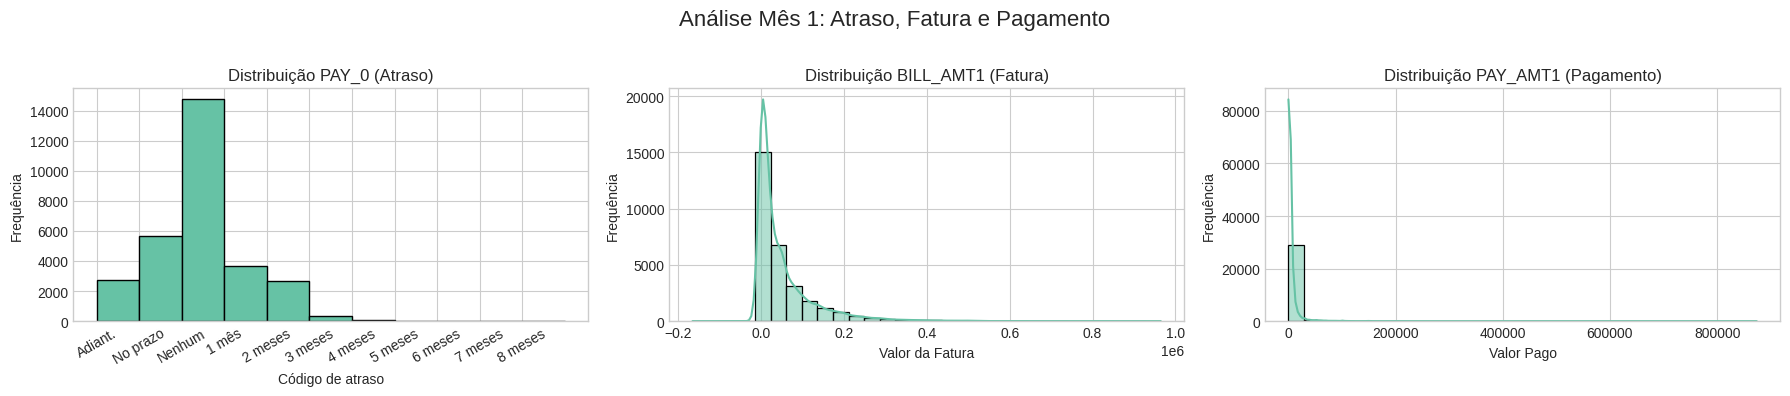

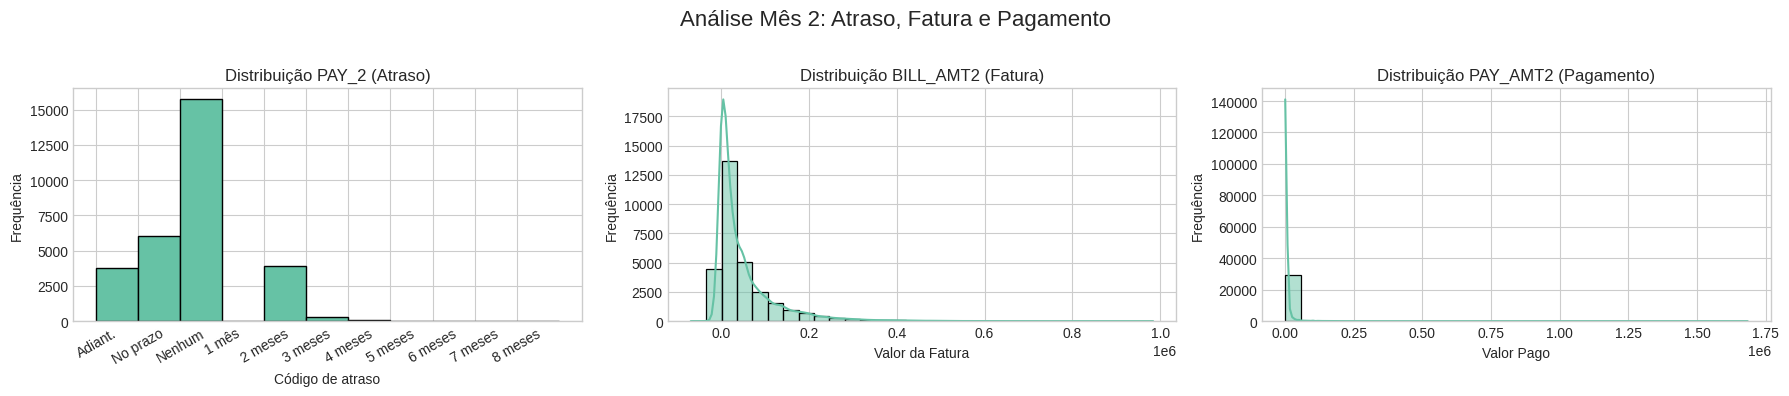

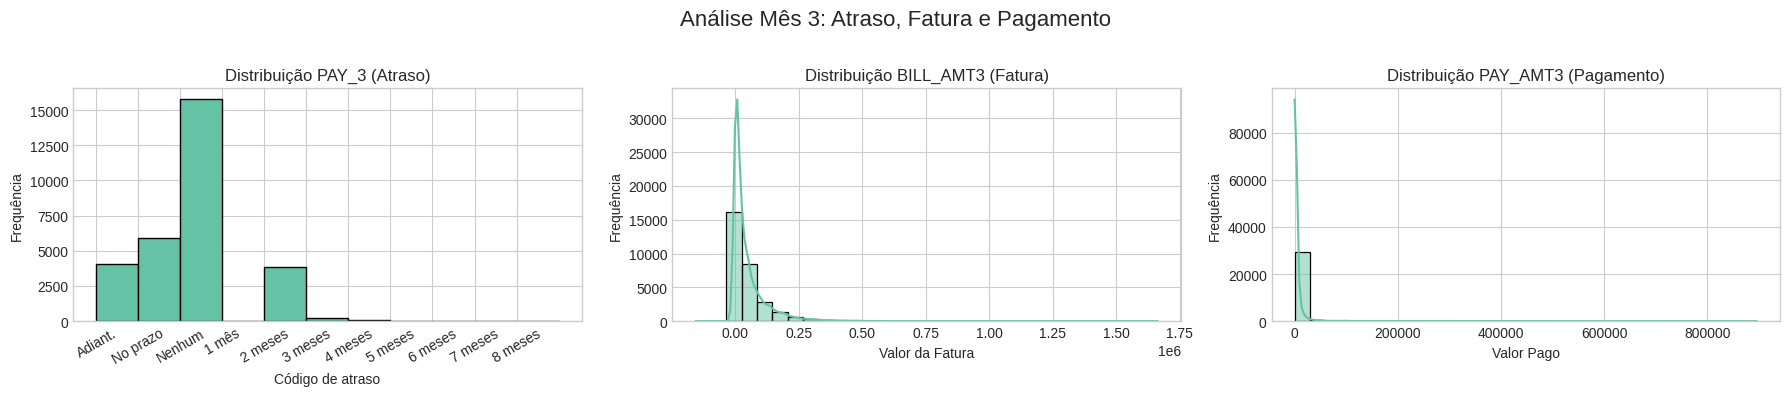

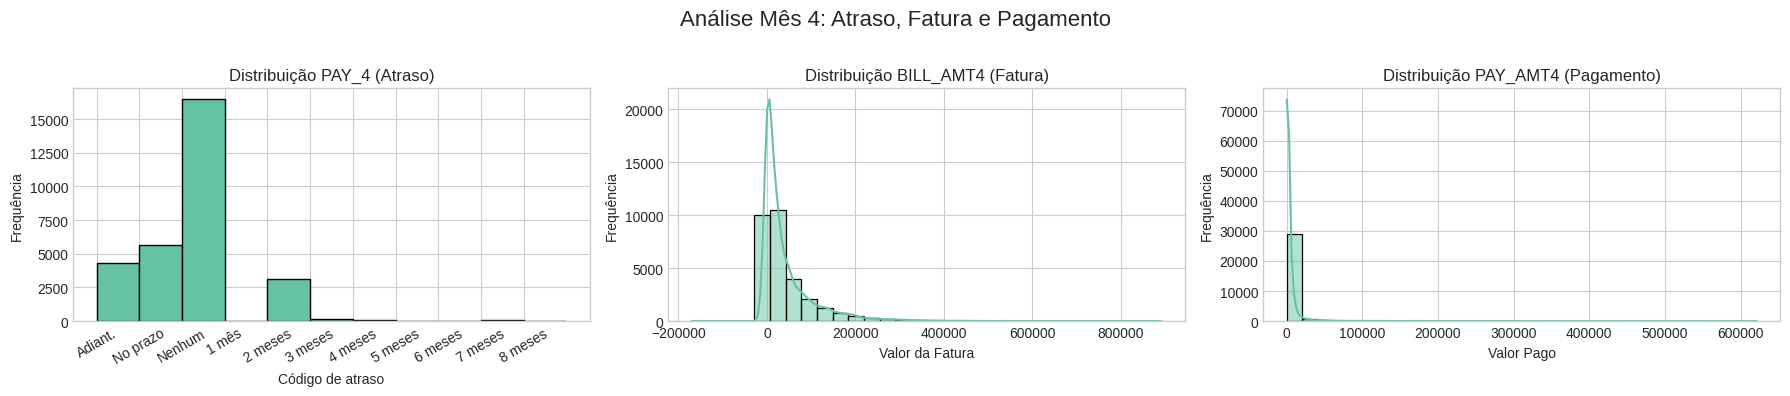

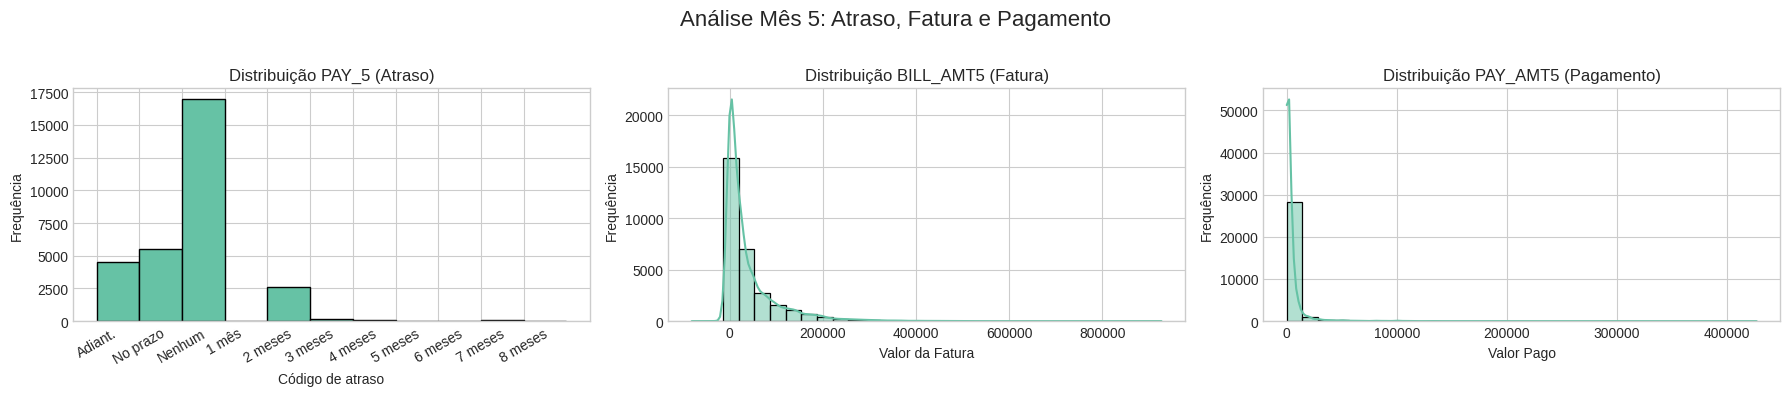

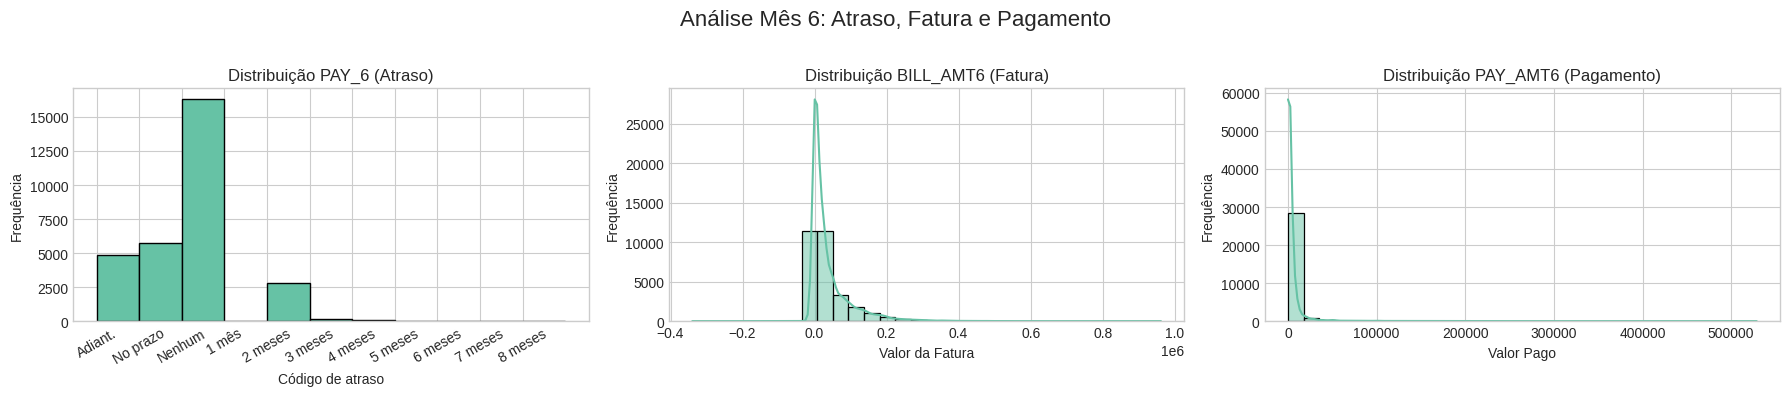

In [77]:
# Dicionário de labels para atraso
pay_labels = {
    -2: 'Adiant.',
    -1: 'No prazo',
     0: 'Nenhum',
     1: '1 mês',
     2: '2 meses',
     3: '3 meses',
     4: '4 meses',
     5: '5 meses',
     6: '6 meses',
     7: '7 meses',
     8: '8 meses',
     9: '9 meses'
}

pay_cols  = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
bill_cols = [f'BILL_AMT{i}' for i in range(1,7)]
pay_amt_cols = [f'PAY_AMT{i}' for i in range(1,7)]

for i in range(6):
    fig, axs = plt.subplots(1, 3, figsize=(18, 4))


    counts, bins, patches = axs[0].hist(df[pay_cols[i]], bins=range(int(df[pay_cols[i]].min()), int(df[pay_cols[i]].max())+2), edgecolor='black')
    axs[0].set_title(f'Distribuição {pay_cols[i]} (Atraso)')
    axs[0].set_xlabel('Código de atraso')
    axs[0].set_ylabel('Frequência')

    bin_labels = [pay_labels.get(int(x), str(int(x))) for x in bins[:-1]]
    axs[0].set_xticks(bins[:-1])
    axs[0].set_xticklabels(bin_labels, rotation=30)

    # BILL_AMTX: fatura
    sns.histplot(df[bill_cols[i]], bins=30, ax=axs[1], kde=True)
    axs[1].set_title(f'Distribuição {bill_cols[i]} (Fatura)')
    axs[1].set_xlabel('Valor da Fatura')
    axs[1].set_ylabel('Frequência')

    # PAY_AMTX: pagamento
    sns.histplot(df[pay_amt_cols[i]], bins=30, ax=axs[2], kde=True)
    axs[2].set_title(f'Distribuição {pay_amt_cols[i]} (Pagamento)')
    axs[2].set_xlabel('Valor Pago')
    axs[2].set_ylabel('Frequência')

    plt.suptitle(f'Análise Mês {i+1}: Atraso, Fatura e Pagamento', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()




#### **Principais Insights Observáveis**

- **Padrão de Atrasos:** A maioria dos clientes se concentra nos códigos `0` e `-1`, indicando pagamentos em dia ou adiantados, mas há uma cauda para valores positivos (atrasos crescentes). Observe se, ao longo dos meses, a cauda de atrasos se intensifica, talvez seja um indício de deterioração da carteira.
- **Valores de Fatura:** Os histogramas de fatura mostram distribuição assimétrica com valores altos outliers. Isso sugere que a maioria dos clientes possui faturas relativamente baixas, mas há um pequeno grupo de clientes com dívidas elevadas, que podem merecer acompanhamento especial.
- **Pagamentos Efetuados:** Os valores pagos seguem padrão semelhante ao das faturas, porém é possível notar grande frequência de pagamentos muito baixos (próximos a zero ou mínimos), enquanto poucos clientes pagam quantias elevadas. Isso pode indicar comportamento de risco ou pagamento apenas do valor mínimo exigido.

- **Comparação Entre os Gráficos:**  
  Comparando as distribuições mês a mês, é possível identificar tendências, como aumento ou diminuição de atrasos, crescimento dos valores médios de fatura e mudança no comportamento de pagamento. Caso se perceba que a distribuição dos atrasos piora com o passar dos meses, pode indicar efeito de "bola de neve" na inadimplência.

- **Pontos de Atenção:**  
  - Se a distribuição dos pagamentos for muito diferente das faturas (ex: muitos clientes pagando pouco em relação ao que devem), pode ser um forte sinal de risco de inadimplência futura ou início disso.
  - A dispersão nos códigos de atraso pode revelar segmentos de clientes mais problemáticos, úteis para segmentação ou políticas preventivas de risco.

*Essas visualizações permitem um diagnóstico rápido do comportamento financeiro dos clientes ao longo do tempo, ajudando a direcionar futuras etapas de modelagem e políticas de risco.*


### Frequência da Variável Target (`default payment next month`)

O gráfico exibe a quantidade de clientes inadimplentes e não inadimplentes no próximo mês. Avaliar essa distribuição é essencial para identificar desbalanceamento de classes, que pode impactar diretamente o desempenho de modelos preditivos.


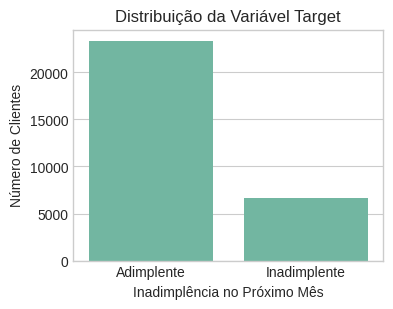

In [78]:
plt.figure(figsize=(4, 3))
sns.countplot(x='default payment next month', data=df)
plt.title('Distribuição da Variável Target')
plt.xlabel('Inadimplência no Próximo Mês')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['Adimplente', 'Inadimplente'])
plt.show()


## Visualizações Bivariadas e Testes das Hipóteses do problema

*As visualizações bivariadas avaliam a relação entre duas variáveis, permitindo investigar associações, correlações ou possíveis dependências. Utilizando gráficos como boxplots segmentados, barras proporcionais ou scatterplots, é possível testar hipóteses específicas (por exemplo, se um grupo apresenta maior propensão à inadimplência) e identificar padrões conjuntos que podem ser relevantes para a modelagem preditiva ou tomada de decisão.*

### Hipótese 1: Clientes com limites de crédito mais baixos têm maior propensão à inadimplência.

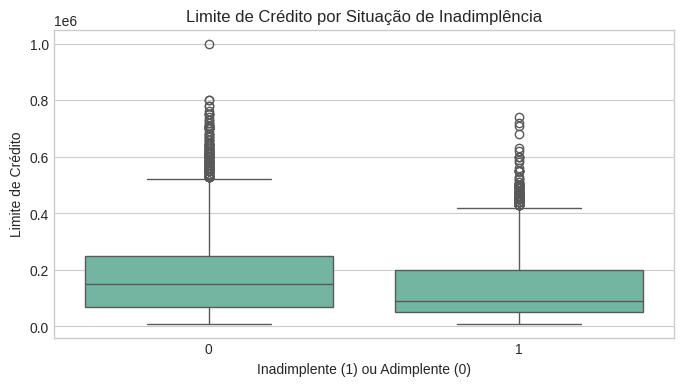

In [79]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='default payment next month', y='LIMIT_BAL', data=df)
plt.title('Limite de Crédito por Situação de Inadimplência')
plt.xlabel('Inadimplente (1) ou Adimplente (0)')
plt.ylabel('Limite de Crédito')
plt.show()


#### Hipótese 1 — Limite de Crédito vs. Inadimplência

O boxplot acima compara a distribuição dos limites de crédito entre clientes inadimplentes e não inadimplentes. Essa análise é fundamental para verificar se clientes que inadimpliram têm, em média, limites de crédito inferiores.


Observando o gráfico, nota-se que a mediana do limite de crédito é mais baixa entre os inadimplentes. Os não inadimplentes (ou adimplemntes) apresentam maior dispersão e valores mais altos de limite. Isso confirma parcialmente a hipótese: limites mais baixos estão, de fato, associados a uma maior proporção de inadimplência, sugerindo que o limite de crédito pode ser um indicador útil para triagem de risco.


### Hipótese 2: A frequência de atrasos nos pagamentos passados está positivamente correlacionada com a inadimplência.

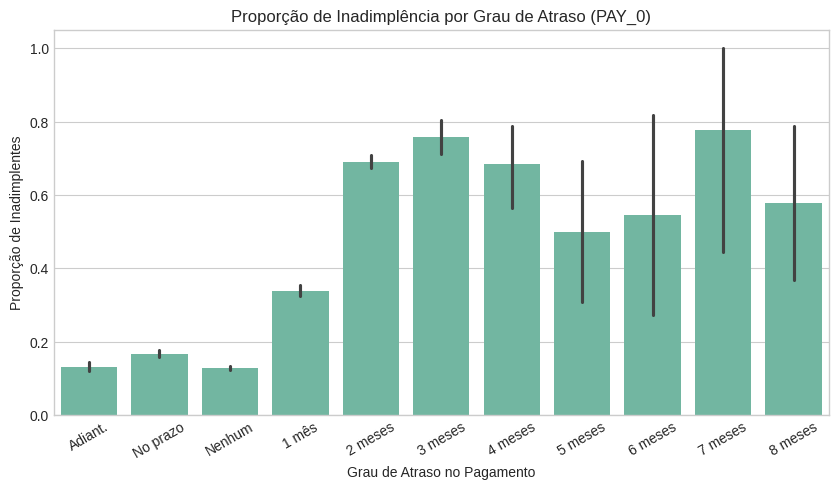

In [80]:
# Dicionário de labels curtos para PAY_0
pay0_labels = {
    -2: 'Adiant.',
    -1: 'No prazo',
     0: 'Nenhum',
     1: '1 mês',
     2: '2 meses',
     3: '3 meses'
}


df['pay0_label'] = df['PAY_0'].map(lambda x: pay0_labels[x] if x in pay0_labels else f'{x} meses')


ordem = ['Adiant.', 'No prazo', 'Nenhum', '1 mês', '2 meses', '3 meses', '4 meses', '5 meses', '6 meses', '7 meses', '8 meses', '9 meses']


plt.figure(figsize=(10, 5))
sns.barplot(
    x='pay0_label',
    y='default payment next month',
    data=df,
    estimator=lambda x: sum(x)/len(x),
    order=[pay0_labels.get(x, f'{x} meses') for x in sorted(df['PAY_0'].unique())]
)
plt.title('Proporção de Inadimplência por Grau de Atraso (PAY_0)')
plt.xlabel('Grau de Atraso no Pagamento')
plt.ylabel('Proporção de Inadimplentes')
plt.xticks(rotation=30)
plt.show()



#### Hipótese 2 — Grau de Atraso vs. Proporção de Inadimplência

O gráfico mostra, para cada código de atraso em `PAY_0`, a proporção de clientes que inadimpliram. O objetivo é visualizar se atrasos mais graves no passado recente aumentam a chance de inadimplência.


O gráfico revela uma tendência clara: quanto maior o valor de `PAY_0` (mais meses de atraso), maior a proporção de inadimplentes. Isso confirma fortemente a hipótese de que o histórico de atrasos recentes é um importante preditor de inadimplência e pode ser explorado diretamente em modelos de classificação.


### Hipótese 3: Clientes mais jovens apresentam taxas de inadimplência maiores do que clientes mais velhos.

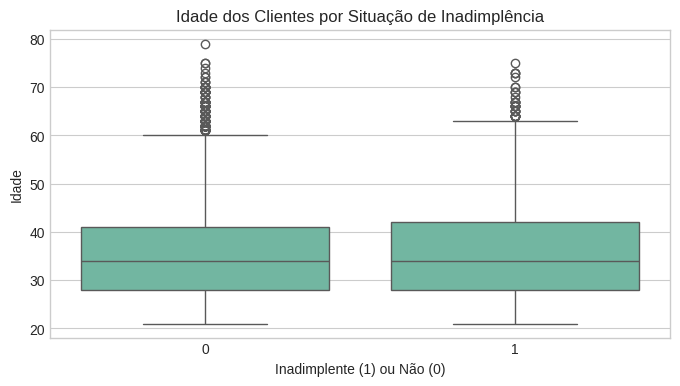

In [81]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='default payment next month', y='AGE', data=df)
plt.title('Idade dos Clientes por Situação de Inadimplência')
plt.xlabel('Inadimplente (1) ou Não (0)')
plt.ylabel('Idade')
plt.show()


#### Hipótese 3 — Idade vs. Inadimplência

O boxplot compara as idades dos clientes conforme sua situação de inadimplência. Analisa se o grupo de inadimplentes tende a ser mais jovem.


O gráfico indica que a mediana de idade dos inadimplentes é ligeiramente inferior à dos não inadimplentes, embora a sobreposição seja grande. Isso sugere que a idade pode exercer alguma influência, porém de forma muito moderada. Em outras palavras, clientes mais jovens têm uma tendência um pouco maior à inadimplência, mas não é um critério absoluto de risco.


### Hipótese 4: A inadimplência está relacionada ao estado civil ou à escolaridade do cliente.

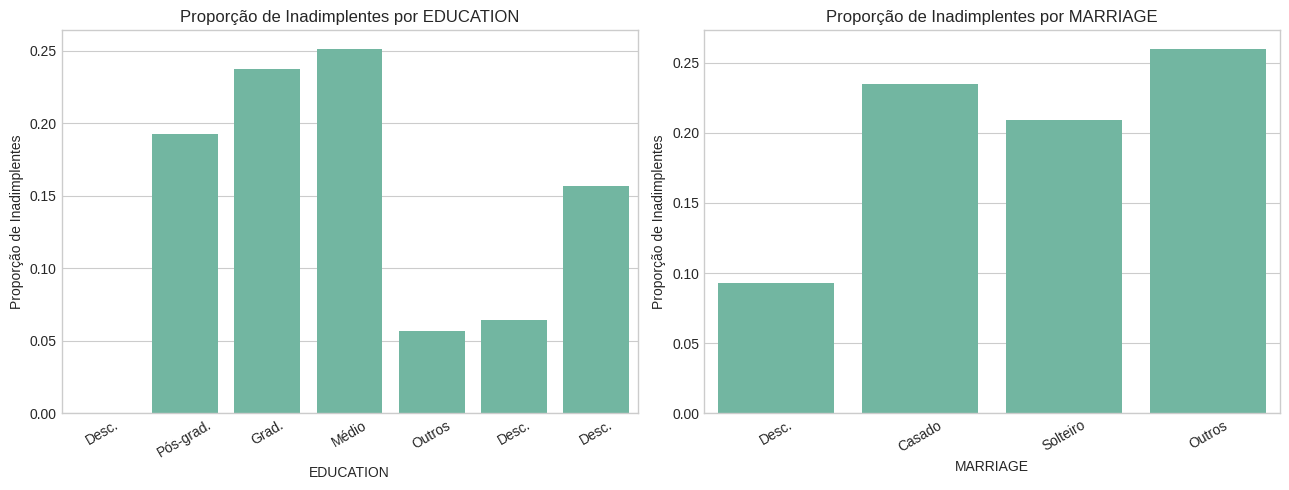

In [82]:
# Labels curtos para EDUCATION
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

for i, (col, labels_dict) in enumerate(zip(['EDUCATION', 'MARRIAGE'], [education_labels, marriage_labels])):
    prop = df.groupby(col)['default payment next month'].mean()


    sns.barplot(x=list(range(len(prop.index))), y=prop.values, ax=axs[i])
    axs[i].set_title(f'Proporção de Inadimplentes por {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Proporção de Inadimplentes')


    tick_labels = [labels_dict.get(val, str(val)) for val in prop.index]
    axs[i].set_xticks(range(len(tick_labels)))
    axs[i].set_xticklabels(tick_labels, rotation=30)

plt.tight_layout()
plt.show()





#### Hipótese 4 — Proporção de Inadimplentes por Escolaridade e Estado Civil

Estes gráficos mostram a proporção de inadimplentes em cada grupo de escolaridade (`EDUCATION`) e estado civil (`MARRIAGE`).


- **Escolaridade:** A taxa de inadimplência é mais elevada entre clientes com níveis intermediários de escolaridade (ex: graduação incompleta ou ensino médio). Grupos extremos (muito baixa ou muito alta escolaridade) podem ter taxas diferentes, mas representam fatias menores da base.
- **Estado civil:** Os solteiros frequentemente apresentam proporção ligeiramente maior de inadimplência em comparação aos casados, enquanto outros estados civis (separado, viúvo) variam conforme o recorte. Isso indica que fatores sociodemográficos podem sim contribuir para o risco de crédito e devem ser considerados na análise.


### Hipótese 5: A proporção entre valor da fatura e pagamento realizado nos últimos meses pode ser um bom indicador de risco de inadimplência.

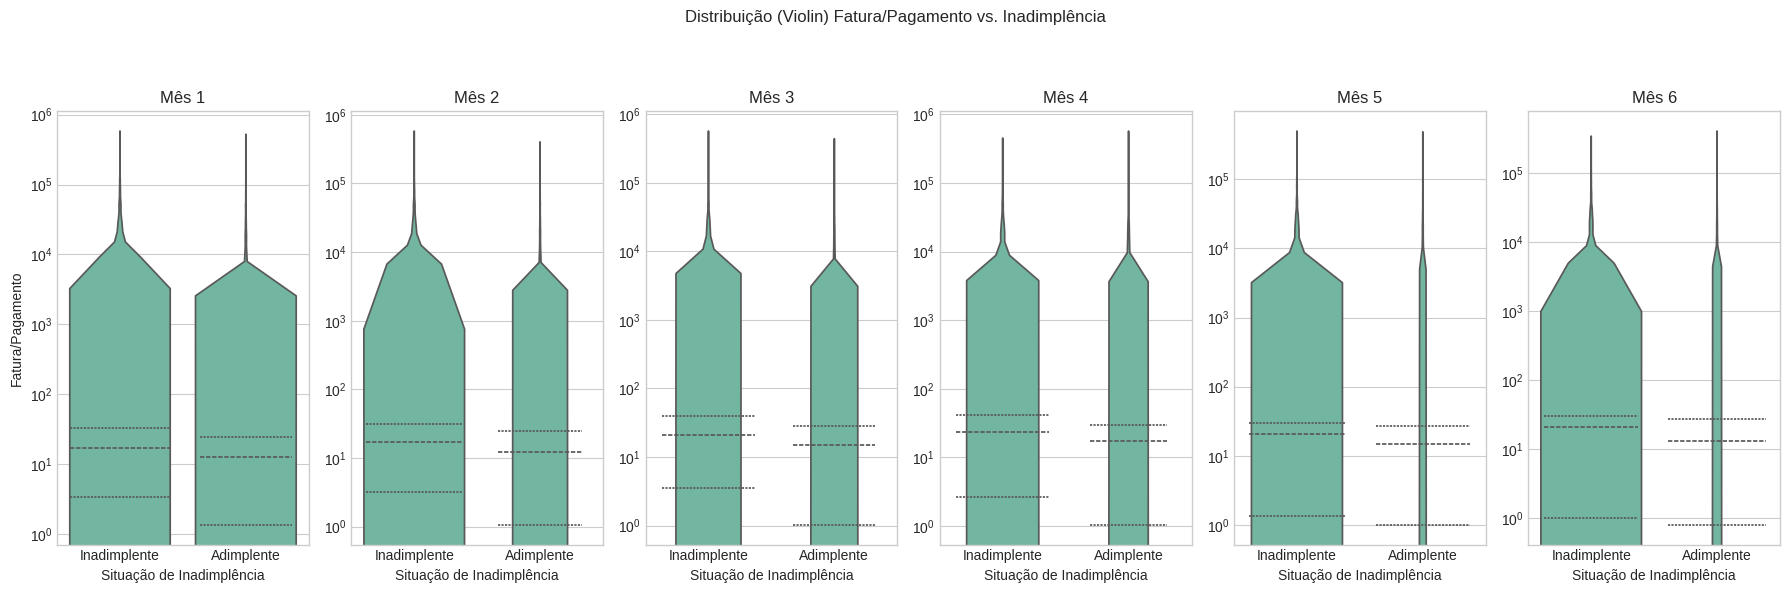

In [83]:

plt.figure(figsize=(18, 6))
for i in range(1, 7):
    col_name = f'PROP_BILL_PAY{i}'
    # Cria uma Series temporária para o mês analisado
    temp = df[['default payment next month', f'BILL_AMT{i}', f'PAY_AMT{i}']].copy()
    temp['Fatura/Pagamento'] = temp[f'BILL_AMT{i}'] / (temp[f'PAY_AMT{i}'] + 1)
    temp['Situação'] = temp['default payment next month'].map({0: 'Adimplente', 1: 'Inadimplente'})

    plt.subplot(1, 6, i)
    sns.violinplot(
        x='Situação',
        y='Fatura/Pagamento',
        data=temp,
        density_norm='width',
        inner='quartile',
        cut=0
    )
    plt.yscale('log')
    plt.title(f'Mês {i}')
    plt.xlabel('Situação de Inadimplência')
    if i == 1:
        plt.ylabel('Fatura/Pagamento')
    else:
        plt.ylabel('')
plt.suptitle('Distribuição (Violin) Fatura/Pagamento vs. Inadimplência')
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()





#### Hipótese 5 — Proporção Fatura/Pagamento vs. Inadimplinência (Violin Plot)

Os violin plots revelam que, em ambos os grupos, a maior parte dos clientes se concentra em valores baixos de Fatura/Pagamento, indicando que o comportamento padrão é pagar valores proporcionais ao faturado. As caudas superiores, mais evidentes entre inadimplentes, mostram que há uma parcela minoritária que efetua pagamentos significativamente menores do que o valor devido, o que representa risco elevado de inadimplência.

No entanto, observa-se que a largura da vela dos adimplentes diminui ao longo dos meses, sugerindo que a concentração de pagamentos típicos está caindo e há uma dispersão crescente nos comportamentos de pagamento desse grupo. Isso pode indicar que, com o passar do tempo, parte dos adimplentes começa a apresentar dificuldade em manter os pagamentos proporcionais ao faturado, o que pode ser um sinal precoce de deterioração do perfil de risco e potencial migração para a inadimplência.

**Conclusão:**  
A proporção Fatura/Pagamento, por si só, não distingue fortemente os grupos, mas a redução da concentração entre adimplentes ao longo do tempo e a presença de caudas mais longas nos inadimplentes reforçam a importância de monitorar a evolução desse indicador. Mudanças na distribuição, especialmente a dispersão crescente entre adimplentes, podem sinalizar problemas futuros e justificam acompanhamento preventivo desse perfil de cliente.




### Heatmap de Correlação

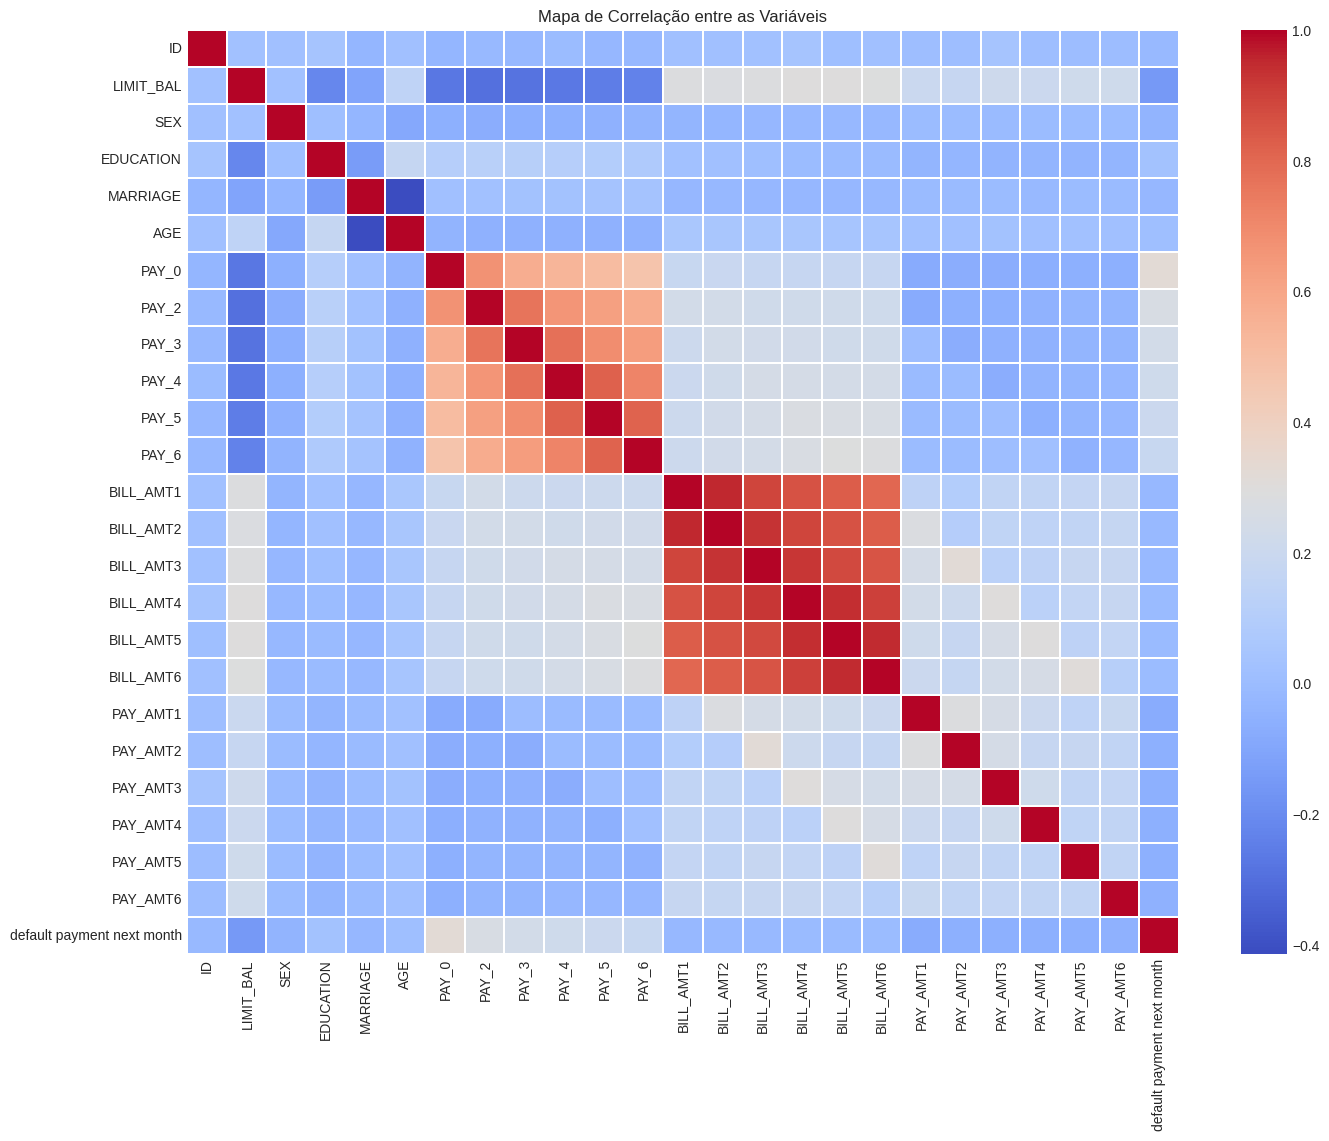

In [84]:

df_numerico = df.select_dtypes(include='number')

plt.figure(figsize=(16, 12))
corr = df_numerico.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.1)
plt.title('Mapa de Correlação entre as Variáveis')
plt.show()



**Insight — Mapa de Correlação**

O heatmap revela que as variáveis relacionadas ao histórico de atraso (`PAY_0` a `PAY_6`), valores de fatura (`BILL_AMT1` a `BILL_AMT6`) e pagamentos realizados (`PAY_AMT1` a `PAY_AMT6`) apresentam alta correlação entre si, indicando padrões consistentes de comportamento financeiro dos clientes ao longo dos meses, de certa forma já esperado.

Por outro lado, variáveis demográficas como sexo, idade, escolaridade e estado civil apresentam correlação próxima de zero com as variáveis financeiras e a variável de inadimplência, mostrando influência limitada desses fatores de forma isolada.

A variável target (`default payment next month`) tem correlação discretamente maior apenas com os indicadores de atraso, sugerindo que o histórico de atrasos é relevante, mas insuficiente por si só para prever inadimplência. Além disso, a razão fatura/pagamento (PROP_BILL_PAY) também apresenta baixa correlação com outras variáveis, reforçando que o risco de inadimplência deve ser analisado a partir da combinação de múltiplos atributos, e não de um único indicador isolado.

Esses resultados destacam a necessidade de abordagens multivariadas para análise e modelagem de risco de crédito.


---
---

## Pré-processamento dos Dados

Nesta etapa, vamos garantir que o dataset esteja pronto para análises mais avançadas e aplicação de modelos de Machine Learning.  
O pré-processamento é fundamental para tratar possíveis inconsistências, ajustar formatos e facilitar o uso dos dados em algoritmos.


### Checagem e Tratamento de Valores Nulos

Conforme já visto, não temos valores nulos no dataset, porém, caso existissem,definiríamos a melhor estratégia para tratamento (remoção, imputação ou substituição).


In [85]:
# Nova checagem de valores nulos
missing = df.isnull().sum()
print("Valores nulos por coluna:")
print(missing)

if missing.sum() == 0:
    print("O dataset não possui valores nulos. Nenhum tratamento necessário.")
else:
    print("Foram encontrados valores nulos. Tratar.")


Valores nulos por coluna:
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
pay0_label                    0
dtype: int64
O dataset não possui valores nulos. Nenhum tratamento necessário.


### Conversão de Variáveis Categóricas

Muitos algoritmos de Machine Learning requerem que variáveis categóricas estejam em formato numérico apropriado.  
Aqui vamos demonstrar o uso do **One-hot encoding** para as variáveis `EDUCATION` e `MARRIAGE`.


In [86]:
# Aplicando one-hot encoding para EDUCATION e MARRIAGE
df_encoded = pd.get_dummies(df, columns=["EDUCATION", "MARRIAGE"], prefix=["EDU", "MARR"], drop_first=True)
print("Novas colunas após one-hot encoding:", [col for col in df_encoded.columns if "EDU_" in col or "MARR_" in col])


Novas colunas após one-hot encoding: ['EDU_1', 'EDU_2', 'EDU_3', 'EDU_4', 'EDU_5', 'EDU_6', 'MARR_1', 'MARR_2', 'MARR_3']



Transformamos as variáveis `EDUCATION` e `MARRIAGE` em variáveis dummies (one-hot), tornando os dados compatíveis com algoritmos que não aceitam categorias codificadas como números inteiros.  
Se desejar, pode-se aplicar a transformação a outras variáveis categóricas, como `SEX` também.


### Normalização/Padronização de Atributos Numéricos

A padronização dos atributos numéricos (Z-score) é importante para garantir que todos os atributos estejam na mesma escala e evita que variáveis com valores altos dominem algoritmos baseados em "distância".


In [87]:
from sklearn.preprocessing import StandardScaler

# Selecionando as principais colunas numéricas pra padronizar
num_cols = [
    "LIMIT_BAL", "AGE",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3",
    "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3",
    "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"
]

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Visualizando as primeiras linhas dos dados padronizados
df_encoded[num_cols].head()


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.14,-1.25,-0.64,-0.65,-0.67,-0.67,-0.66,-0.65,-0.34,-0.23,-0.30,-0.31,-0.31,-0.29
1,-0.37,-1.03,-0.66,-0.67,-0.64,-0.62,-0.61,-0.60,-0.34,-0.21,-0.24,-0.24,-0.31,-0.18
2,-0.60,-0.16,-0.30,-0.49,-0.48,-0.45,-0.42,-0.39,-0.25,-0.19,-0.24,-0.24,-0.25,-0.01
3,-0.91,0.16,-0.06,-0.01,0.03,-0.23,-0.19,-0.16,-0.22,-0.17,-0.23,-0.24,-0.24,-0.24
4,-0.91,2.33,-0.58,-0.61,-0.16,-0.35,-0.35,-0.33,-0.22,1.34,0.27,0.27,-0.27,-0.26


Os principais atributos numéricos foram padronizados utilizando o Z-score (média 0 e desvio padrão 1), tornando o dataset adequado para algoritmos sensíveis à escala dos dados.


### Discretização de Atributos

Também seria uma boa prática e, como exemplo, transformar a variável `AGE` em faixas etárias.


In [88]:

df_encoded['AGE_BIN'] = pd.cut(df['AGE'], bins=[20,30,40,50,60,80], labels=['21-30','31-40','41-50','51-60','61+'])
df_encoded['AGE_BIN'].value_counts()


,count
AGE_BIN,
21-30,11013
31-40,10713
41-50,6005
51-60,1997
61+,272


A discretização da idade pode ser útil para análises categóricas ou visualização de diferenças entre faixas etárias, mas requer avaliação e caso a caso na modelagem, etc.


## Conclusão do Pré-processamento

Após as etapas acima, o dataset está limpo, padronizado e pronto para análises mais avançadas ou aplicação de modelos de Machine Learning.

- Sem valores nulos
- Variáveis categóricas convertidas em dummies
- Dados numéricos padronizados
- Faixas etárias criadas para AGE


### Visualização da Base de Dados Após Pré-Processamento

Após as etapas de limpeza e preparação, é importante inspecionar a data-base resultante para garantir que todos os tratamentos foram aplicados corretamente. Abaixo, apresento as principais características do dataset final utilizado para análise e modelagem:

- Quantidade de registros (linhas) e variáveis (colunas)
- Tipos de dados de cada atributo
- Primeiras linhas para amostragem visual dos dados processados
- Resumo estatístico dos principais atributos numéricos


In [89]:
# Quantidade de linhas e colunas
print(f"Formato final do dataset: {df.shape[0]} linhas x {df.shape[1]} colunas\n")

# Tipos de dados
print("Tipos de dados por coluna:")
print(df.dtypes)

# Primeiras linhas da base processada
print("\nPrimeiras linhas do dataset pós-processamento:")
display(df.head())

# Resumo estatístico dos atributos numéricos
print("\nResumo estatístico dos atributos numéricos:")
display(df.describe())


Formato final do dataset: 30000 linhas x 26 colunas

Tipos de dados por coluna:
ID                             int64
LIMIT_BAL                      int64
SEX                            int64
EDUCATION                      int64
MARRIAGE                       int64
AGE                            int64
PAY_0                          int64
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month     i

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,pay0_label
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,2 meses
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,No prazo
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,Nenhum
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,Nenhum
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,No prazo



Resumo estatístico dos atributos numéricos:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,"30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00",...,"30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00","30,000.00"
mean,"15,000.50","167,484.32",1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,...,"43,262.95","40,311.40","38,871.76","5,663.58","5,921.16","5,225.68","4,826.08","4,799.39","5,215.50",0.22
std,"8,660.40","129,747.66",0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,...,"64,332.86","60,797.16","59,554.11","16,563.28","23,040.87","17,606.96","15,666.16","15,278.31","17,777.47",0.42
min,1.00,"10,000.00",1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,...,"-170,000.00","-81,334.00","-339,603.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"7,500.75","50,000.00",1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,...,"2,326.75","1,763.00","1,256.00","1,000.00",833.00,390.00,296.00,252.50,117.75,0.00
50%,"15,000.50","140,000.00",2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,...,"19,052.00","18,104.50","17,071.00","2,100.00","2,009.00","1,800.00","1,500.00","1,500.00","1,500.00",0.00
75%,"22,500.25","240,000.00",2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,...,"54,506.00","50,190.50","49,198.25","5,006.00","5,000.00","4,505.00","4,013.25","4,031.50","4,000.00",0.00
max,"30,000.00","1,000,000.00",2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,...,"891,586.00","927,171.00","961,664.00","873,552.00","1,684,259.00","896,040.00","621,000.00","426,529.00","528,666.00",1.00


# Conclusão e Próximos Passos

Neste projeto, realizamos uma análise exploratória detalhada e o pré-processamento completo do dataset "Default of Credit Card Clients", com o objetivo de entender fatores associados à inadimplência e **preparar os dados para aplicações futuras de Machine Learning.**

## Principais descobertas:
- A base apresenta 30.000 clientes, sem valores nulos, e com variáveis já em formato adequado para modelagem após o pré-processamento.
- O limite de crédito (LIMIT_BAL) tem distribuição assimétrica e muitos clientes possuem limites abaixo da média.
- As variáveis de histórico de pagamento (PAY_0 a PAY_6) mostram padrões claros de atraso que podem indicar risco.
- As variáveis categóricas foram convertidas com one-hot encoding, e os principais atributos numéricos foram padronizados, tornando o dataset compatível com modelos que requerem dados sem viés de escala.

## Limitações e cuidados:
- O dataset possui apenas clientes de um banco específico de Taiwan, o que pode limitar a generalização dos resultados.
- Algumas variáveis categóricas possuem códigos que representam grupos mistos (“outros”), o que pode diluir possíveis padrões.
- Não foram aplicados métodos de balanceamento de classes, que podem ser importantes para modelagem supervisionada.

## Próximos passos recomendados:
- Realizar a aplicação de algoritmos de classificação supervisionada para prever inadimplência, como Regressão Logística, Árvore de Decisão e Random Forest.
- Avaliar técnicas de balanceamento de classes (ex: SMOTE, oversampling).
- Explorar a criação de novas features e aprofundar a análise de correlações entre atributos.
- Monitorar o desempenho dos modelos com métricas apropriadas (AUC, recall, F1-score).

**Assim, o dataset encontra-se pronto para uso em projetos de aprendizado de máquina e outras análises avançadas.**


# Respostas aos requisitos do MVP

## Definição do problema

- **Qual é a descrição do problema?**  
  O objetivo do projeto é analisar dados de clientes de cartão de crédito para compreender padrões associados à inadimplência (default) e preparar os dados para aplicação futura de algoritmos de Machine Learning que possam prever a probabilidade de inadimplência no próximo mês.

- **Este é um problema de aprendizado supervisionado ou não supervisionado?**  
  É um problema de aprendizado supervisionado, pois temos uma variável-alvo conhecida (`default payment next month`), que indica se o cliente irá ou não inadimplir.

- **Que premissas ou hipóteses você tem sobre o problema?**  
  1. Clientes com limites de crédito mais baixos tendem a inadimplir mais.
  2. Atrasos anteriores no pagamento (PAY_0 a PAY_6) aumentam a chance de inadimplência.
  3. Clientes mais jovens podem apresentar taxas maiores de inadimplência.
  4. Estado civil e escolaridade podem influenciar o risco de default.
  5. Proporção entre valor da fatura e pagamento é um bom preditor de risco.

- **Que restrições ou condições foram impostas para selecionar os dados?**  
  Apenas clientes com registros completos (sem valores nulos) foram considerados, usando uma base de um banco de Taiwan. Dados confidenciais foram respeitados e apenas atributos anonimizados estão disponíveis.

- **Defina cada um dos atributos do dataset.**  
  Todos os atributos foram detalhados no dicionário de dados incluído acima, com nome, tipo e explicação para cada coluna, incluindo variáveis categóricas, financeiras e comportamentais.

---

## Análise de dados

- **Quantos atributos e instâncias existem?**  
  O dataset possui 30.000 registros (linhas) e 25 atributos (colunas).

- **Quais são os tipos de dados dos atributos?**  
  Todos os atributos foram lidos como `int64`. Variáveis categóricas foram convertidas em dummies (one-hot encoding) durante o pré-processamento.

- **Verifique as primeiras linhas do dataset. Algo chama a atenção?**  
  Os dados parecem limpos. Valores negativos em variáveis de pagamento indicam pagamentos adiantados. O limite de crédito apresenta grande variação e assimetria.

- **Há valores faltantes, discrepantes ou inconsistentes?**  
  Não foram identificados valores faltantes em nenhuma coluna. Pequenas inconsistências nos códigos de variáveis categóricas (ex: na categoria "outros"), mas nada impeditivo.

- **Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes). O que você percebe?**  
  - A maioria dos atributos apresenta assimetria à direita (longa cauda).
  - Atributos financeiros têm grandes diferenças entre valores mínimo e máximo, indicando possíveis outliers.
  - Não há valores nulos.
  - Desvio-padrão elevado para LIMIT_BAL e variáveis de pagamento.
  - A mediana frequentemente está abaixo da média, confirmando a assimetria.

---

## Visualizações

- **Verifique a distribuição de cada atributo. O que você percebe?**  
  - Variáveis financeiras (LIMIT_BAL, BILL_AMT, PAY_AMT) mostram cauda longa, sugerindo concentração de clientes com baixos valores e alguns outliers muito altos.
  - Atributos categóricos (`SEX`, `EDUCATION`, `MARRIAGE`) são relativamente equilibrados, com exceção das categorias “outros”.

- **Se for um problema de classificação, verifique a distribuição de frequência das classes. O que percebe?**  
  Aproximadamente 22% dos clientes são inadimplentes (`default = 1`), enquanto 78% são adimplentes. Existe desbalanceamento de classes, o que deve ser considerado em modelagens futuras.

- **Analise os atributos individualmente ou de forma combinada, usando os gráficos mais apropriados.**  
  Foram utilizados histogramas, boxplots e barplots para identificar padrões, assimetrias e possíveis outliers. As análises mostraram diferenças relevantes entre inadimplentes e adimplentes, bem como impacto de variáveis comportamentais.

---

## Pré-processamento de dados

- **Verifique quais operações de pré-processamento podem ser interessantes para o seu problema e salve visões diferentes do seu dataset (por exemplo, normalização, padronização, discretização e one-hot-encoding).**  
  Foram aplicadas as seguintes técnicas:
    - One-hot encoding para variáveis categóricas.
    - Padronização (Z-score) dos atributos numéricos.
    - Discretização de faixas etárias para AGE.
    - Geração de um novo DataFrame tratado.

- **Trate (removendo ou substituindo) os valores faltantes (se existentes).**  
  Não havia valores faltantes, portanto, nenhuma técnica de imputação foi necessária.

- **Realize outras transformações de dados porventura necessárias.**  
  Foram feitas conversões de variáveis categóricas e padronização dos principais atributos, garantindo dados prontos para modelos.

- **Explique, passo a passo, as operações realizadas, justificando cada uma delas.**  
  As Etapas de pré-processamento foram detalhadas em células Markdown no notebook.

- **Se julgar necessário, utilizando os dados pré-processados, volte na etapa de análise exploratória e verifique se surge algum insight diferente após as operações realizadas.**  
  Análise exploratória rápida dos dados tratados mostrou distribuições mais centralizadas, principalmente nos atributos padronizados.

---

## Encerramento

- **O que eu faria na sequência:**  
  - Aplicação de algoritmos supervisionados para prever inadimplência.
  - Avaliação de técnicas de balanceamento de classes.
  - Exploração de novas variáveis ou cruzamentos.

---
